In [ ]:

pip install easyocr


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install easyocr
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import pytesseract
from PIL import Image

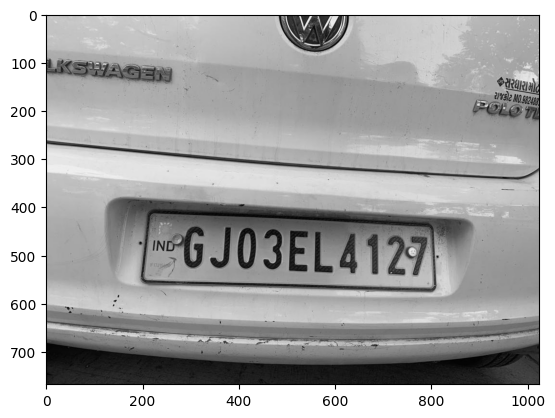

In [ ]:
img = cv2.imread('/content/123.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

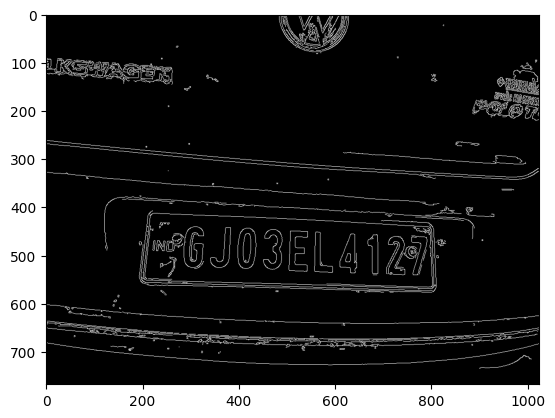

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

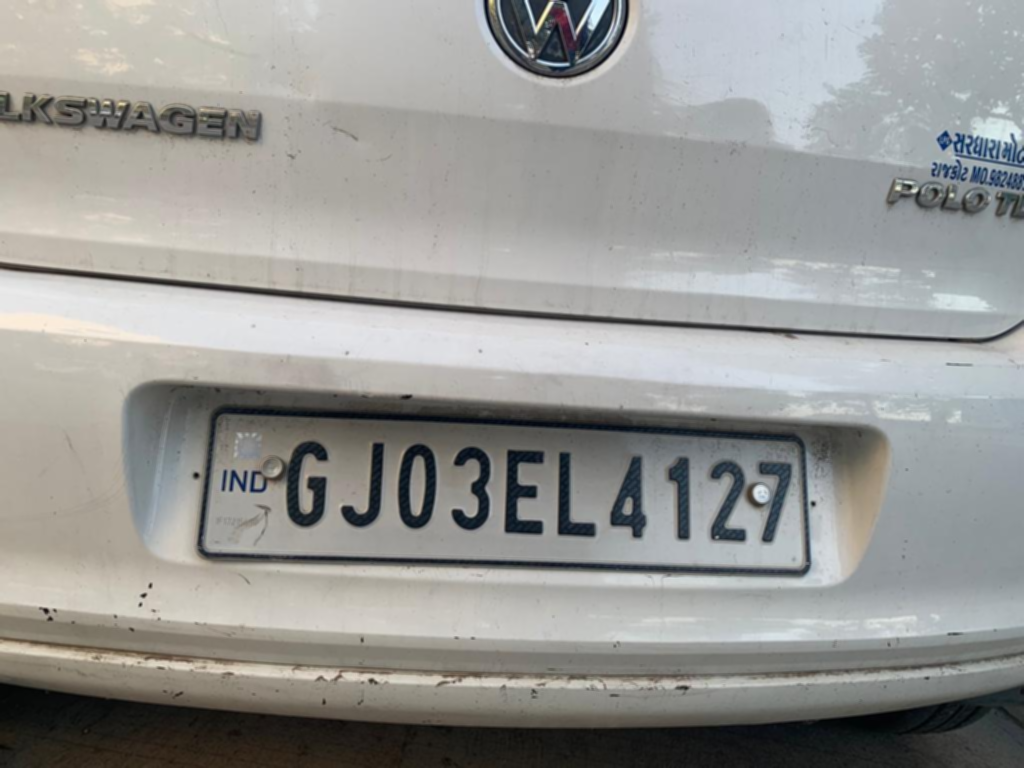

In [ ]:
# Define the kernel size for the mean filter
kernel_size = (3, 3)

# Apply the mean filter
img_filtered = cv2.blur(img, kernel_size)

# Display the original and filtered images
cv2_imshow( img_filtered)

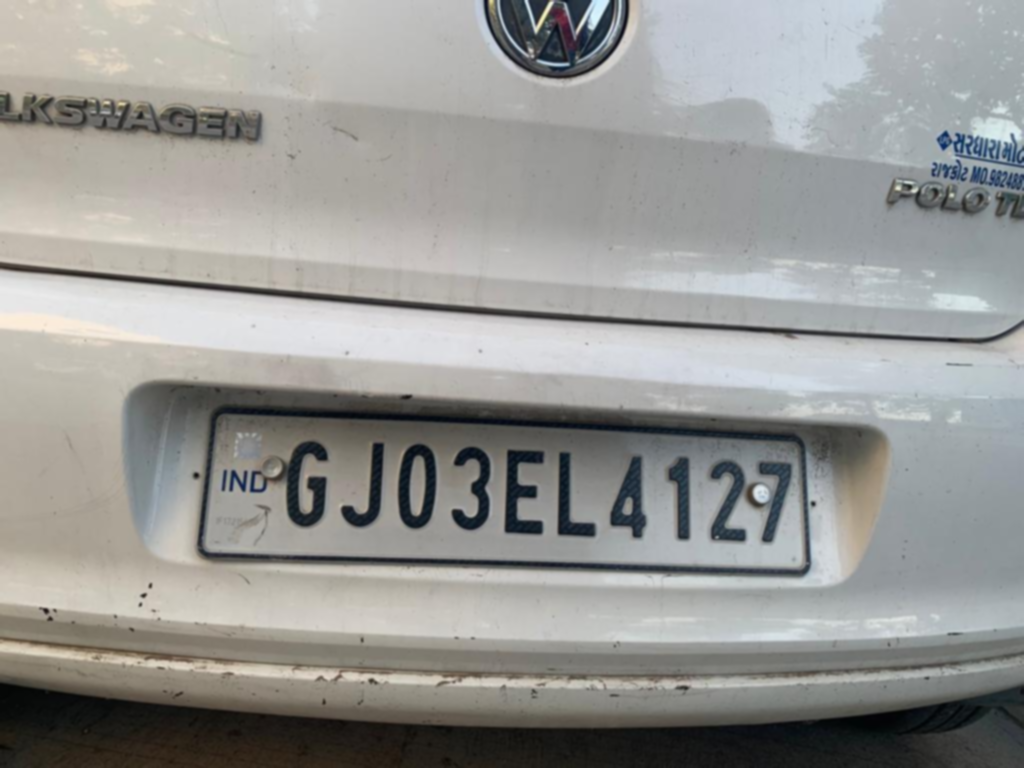

In [ ]:
# Apply Gaussian blur
blur = cv2.GaussianBlur(img, (5, 5), 0)
cv2_imshow(blur)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform adaptive thresholding to remove noise and highlight the license plate
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 101, 21)

# Perform morphological operations to remove noise and fill in gaps
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Find contours in the image
contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

# Sort the contours in descending order of their area
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Loop over the contours to find the license plate
for contour in contours:
    # Find the bounding box of the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Check if the aspect ratio of the bounding box matches that of a license plate
    aspect_ratio = w / float(h)
    if aspect_ratio >= 2 and aspect_ratio <= 5:
        # Extract the license plate region
        plate = img[y:y+h, x:x+w]

        # Convert the license plate region to grayscale
        plate_gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)

        # Apply Otsu's thresholding to the license plate region
        _, plate_thresh = cv2.threshold(plate_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Apply morphological operations to the license plate region to remove noise
        plate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
        plate_morph = cv2.morphologyEx(plate_thresh, cv2.MORPH_CLOSE, plate_kernel)
        
        # Show the license plate region with bounding box
        image_highlight = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        break

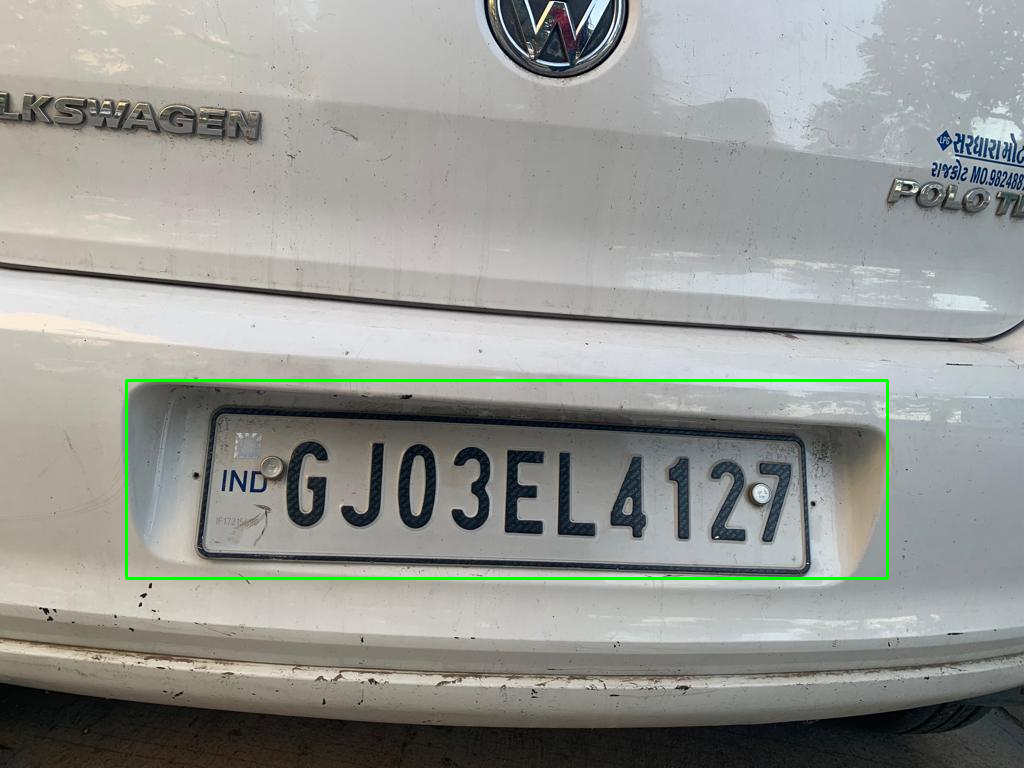

In [ ]:
cv2_imshow(image_highlight)

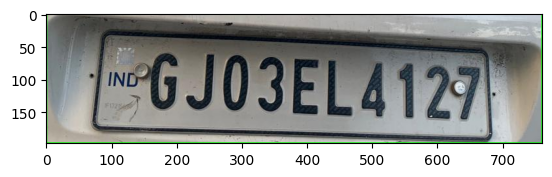

In [ ]:
plt.imshow(cv2.cvtColor(plate, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(plate)
result

[([[92, 86], [148, 86], [148, 118], [92, 118]], 'IND', 0.9994432223508412),
 ([[144, 39], [684, 39], [684, 186], [144, 186]],
  '6J03EL4127',
  0.972960870964909)]